

**File paths**

- visits: `/datasets/visits_info_short.csv`. [Download dataset](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- orders: `/datasets/orders_info_short.csv`. [Download dataset](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- expenses: `/datasets/costs_info_short.csv`. [Download dataset](https://code.s3.yandex.net/datasets/costs_info_short.csv).


In [1]:
# import data

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # session log
    pd.read_csv('/datasets/orders_info_short.csv'),  # purchases
    pd.read_csv('/datasets/costs_info_short.csv'),  # advertising spending
)

In [3]:
visits.head(10)  # look at the first 10 rows of tables

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [6]:
visits.info()  # check general information about tables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
#  the data above shows no gaps

In [10]:
# counting the number of duplicates in tables

visits.duplicated().sum()

0

In [11]:
orders.duplicated().sum()

0

In [12]:
costs.duplicated().sum()

0

In [13]:
# replace spaces in column names with underscores
# make the column names lowercase

visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = costs.columns.str.lower() 

# check the result

visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [14]:
# look at unique table values

visits.value_counts()

user_id       region         device   channel       session_start        session_end        
599326        United States  Android  FaceBoom      2019-05-08 06:00:42  2019-05-08 06:52:28    1
666436527290  United States  iPhone   TipTop        2019-10-23 21:07:52  2019-10-23 21:08:10    1
666435389723  France         iPhone   LeapBob       2019-07-19 15:48:19  2019-07-19 15:51:50    1
                                                    2019-07-15 20:29:18  2019-07-15 21:54:45    1
666433868763  United States  iPhone   MediaTornado  2019-10-05 00:09:54  2019-10-05 00:21:30    1
                                                                                               ..
332723282266  United States  PC       TipTop        2019-10-14 19:12:17  2019-10-14 20:21:35    1
                                                    2019-10-13 16:48:25  2019-10-13 17:46:12    1
332721581435  United States  Android  organic       2019-06-15 16:38:01  2019-06-15 17:09:31    1
332720746034  United Stat

In [15]:
orders.value_counts()

user_id       event_dt             revenue
599326        2019-05-07 20:59:09  4.99       1
660787742648  2019-10-16 22:55:01  4.99       1
660764823805  2019-07-17 09:03:36  4.99       1
              2019-08-05 21:01:38  4.99       1
              2019-08-10 23:57:13  4.99       1
                                             ..
338276441244  2019-10-16 13:08:54  4.99       1
338343388023  2019-05-17 12:39:43  4.99       1
              2019-05-19 17:44:07  4.99       1
              2019-05-26 15:01:30  4.99       1
999895427370  2019-09-19 23:33:23  4.99       1
Length: 40212, dtype: int64

In [16]:
costs.value_counts()

dt          channel             costs  
2019-05-01  AdNonSense          40.950     1
2019-09-01  WahooNetBanner      36.000     1
2019-08-29  WahooNetBanner      35.400     1
            TipTop              318.000    1
            RocketSuperAds      5.850      1
                                          ..
2019-06-29  TipTop              322.400    1
            RocketSuperAds      6.825      1
            OppleCreativeMedia  18.000     1
            MediaTornado        5.520      1
2019-10-27  lambdaMediaAds      12.000     1
Length: 1800, dtype: int64

In [17]:
#  change the data type of dates in tables

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

### Set functions for calculating and analyzing LTV, ROI, retention and conversion.


These are the functions for calculating metric values:

- `get_profiles()` — to create user profiles,
- `get_retention()` — to calculate Retention Rate,
- `get_conversion()` — to calculate conversion,
- `get_ltv()` — for calculating LTV.

As well as functions for plotting graphs:

- `filter_data()` — for data smoothing,
- `plot_retention()` — to plot the Retention Rate,
- `plot_conversion()` — to build a conversion chart,
- `plot_ltv_roi` — for visualizing LTV and ROI.

In [18]:
# function to create user profiles
def get_profiles(sessions, orders, ad_costs):

    # find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis determine the date of the first visit
    # and the first day of the month in which this visitation occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week']= profiles['first_ts'].dt.isocalendar().week

    # add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # combine advertising spending and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of organic user acquisition is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
# function to calculate retention
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    # add the payer column to the passed dimensions list
    dimensions = ['payer'] + dimensions

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # we get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [20]:
# function for calculating conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the size of the cohort
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [21]:
# function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        # we build a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each “cell” in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect a dataframe with user data and CAC values, 
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate the average CAC by parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to ROI table
        roi['cac'] = cac['cac']

        # in the final table we leave the sizes of cohorts, CAC
        # and ROI in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # we get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # table of ROI dynamics
    )

In [22]:
# frame smoothing function

def filter_data(df, window):
    # for each column apply a moving average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [23]:
# function to visualize retention

def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the table of dynamics we leave only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only payer in the indexes of the hold table,
    # add the second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the table of graphs - two columns and two rows, four cells
    # in the first we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # in the third cell - the dynamics of retention of paying
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    # get column names for pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filtering data and plotting
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [24]:
# function to visualize the conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the table of dynamics we leave only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first graph - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # the second graph is the dynamics of conversion
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date will become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [25]:
# function to visualize LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the grid for drawing graphs
    plt.figure(figsize=(20, 10))

    # we exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the ltv dynamics table we leave only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # write the cost of attraction in a separate frame
    cac_history = roi_history[['cac']]

    # from the table roi we exclude the sizes of cohorts and cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph - ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # the second graph is the dynamics of ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # the third graph is the dynamics of cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # fourth graph - roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # the fifth graph is the dynamics of roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all index columns except date will become pivot table columns
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Exploratory data analysis

- Create user profiles. Determine the minimum and maximum user acquisition dates.
- Find out from which countries users come to the application and which country has the most paying users. Build a table showing the number of users and share of paying from each country.
- Find out what devices customers are using and what devices paying users prefer. Build a table showing the number of users and share of paying for each device.
- Study the advertising sources of acquisition and identify the channels from which the most paying users came. Build a table showing the number of users and share of paying for each acquisition channel.


In [26]:
# create user profiles
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,week,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,19,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,28,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,40,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,34,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,40,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,19,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,33,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,26,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,19,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,19,False,0.250435


In [27]:
observation_date = datetime(2019, 11, 1).date() # moment of analysis
horizon_days =  14 # горизонт анализа 

# maximum user acquisition date
max_analysis_date =  profiles['dt'].max()
max_analysis_date

datetime.date(2019, 10, 27)

In [28]:
# minimum user acquisition date
min_analysis_date = profiles['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

Given that the calendar (analysis time) is November 1, 2019, and the business plan states that users should pay off no later than two weeks (i.e. analysis horizon = 14 days) after attraction, you can find out that the maximum the date considering the analysis horizon is October 27, 2019, and the minimum date is May 1, 2019.

In [29]:
# countries and paying users
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})

user_id payer          
              nunique   sum      mean
region                               
France          17450   663  0.037994
Germany         14981   616  0.041119
UK              17575   700  0.039829
United States  100002  6902  0.069019

Users come to the application from four countries: France, Germany, Great Britain and the USA. Most users come from the USA (about 100k users), and the share of paying users is also the highest in the USA - about 7%.

In [30]:
# devices and paying users
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
device['share'] = device.payer / device.user_id
device

,user_id,payer,share
device,,,
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
Mac,30042,1912,0.063644
PC,30455,1537,0.050468


Clients use devices such as iPhone, Android, Mac and PC. Most customers use the iPhone (54.4k devices), and the largest number of paying users (3.3k) account for the iPhone. Phone, Android and Mac - 6% of paying users, PC - 5%.

In [31]:
# channels and paying users
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
channel['share'] = channel.payer / channel.user_id
channel

,user_id,payer,share
channel,,,
FaceBoom,29144,3557,0.122049
TipTop,19561,1878,0.096007
organic,56439,1160,0.020553
WahooNetBanner,8553,453,0.052964
AdNonSense,3880,440,0.113402
RocketSuperAds,4448,352,0.079137
LeapBob,8553,262,0.030633
OppleCreativeMedia,8605,233,0.027077
lambdaMediaAds,2149,225,0.104700


There are 10 advertising sources in total, but most of all users come "organically" (they did not come from advertising channels) - 56.4k users, and among them 1.1k users are paying (and occupy the third line among paying ones). If we consider advertising sources, then the largest flow comes from FaceBoom (29.1k of them 3.5k paying) and TipTop (19.5k of them 1.8k paying).
As a percentage, FaceBoom (12%), AdNonSense (11%), lambdaMediaAds (10%) and TipTop (9%) pay the most.

### Marketing

- Calculate the total cost of marketing.
- Find out how spending is distributed across advertising sources, that is, how much money was spent on each source.
- Build a visualization of the dynamics of changes in expenses over time (by weeks and months) for each source. Try to reflect this in one graph.
- Find out the average cost per user acquisition (CAC) from each source. Use user profiles.


In [32]:
# total marketing spend
round(costs.costs.sum())

105497

In [33]:
# money spent on each source
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Total spent 105k. Most money was spent on TipTop (54.7k) and FaceBoom (32.4k).

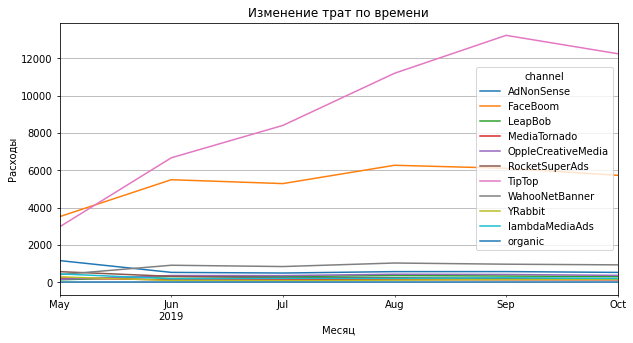

In [34]:
# visualization of the dynamics of changes in spending by months
profiles.pivot_table(
    index='month',  # даты 
    columns='channel',  # источники переходов
    values='acquisition_cost',  
    aggfunc='sum',  
).plot(figsize=(10, 5), grid=True)

plt.title('Изменение трат по времени')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

On the chart, we see a systematic increase in spending by months, especially for FaceBoom and TipTop (almost at the same level in May). TipTop has a peak in September, then a slight decline. FaceBoom has the same level of spending from June to October. The remaining channels are significantly inferior in terms of costs to FaceBoom and TipTop.

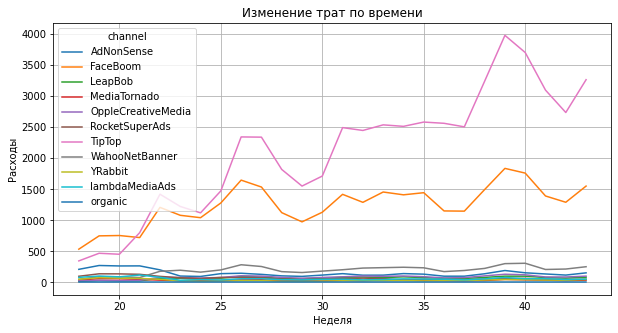

In [35]:
# visualization of the dynamics of changes in spending by months
profiles.pivot_table(
    index='week',  # даты 
    columns='channel',  # источники переходов
    values='acquisition_cost',  
    aggfunc='sum',  
).plot(figsize=(10, 5), grid=True)

plt.title('Изменение трат по времени')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()

The weekly chart also shows that FaceBoom and TipTop are strikingly different from other traffic sources. FaceBoom's spending traffic is consistently high, TipTop's traffic is higher than FaceBoom's from week 25 and peaks at week 38.

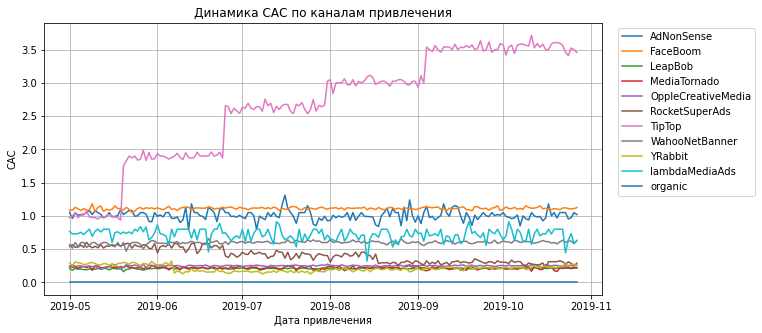

In [36]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

In [37]:
# average CAC across the entire project without organic users
profiles[profiles.channel != 'organic']
cac_no_organic = (profiles.agg({'acquisition_cost': 'mean'}))
round(cac_no_organic, 2)

acquisition_cost    0.7
dtype: float64

The average CAC across the entire project without organic users is 0.7. We don't count organic users because no money was spent to acquire them. Attracting one user from the TipTop channel cost the company an average of 2.7 units, from FaceBoom - 1.1 units, from LambdaMediaAds - 0.7 units.

### Advertising ROI Estimation

Use LTV, ROI, and CAC charts to analyze your ad's ROI. Consider that November 1, 2019 is on the calendar, and the business plan states that users should pay off no later than two weeks after the acquisition. The need to include organic users in the analysis is up to you.

- Analyze advertising ROI using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
- Check the conversion of users and the dynamics of its change. Do the same with user retention. Build and study conversion and retention graphs.
- Analyze ad ROI by device. Plot LTV and ROI charts as well as LTV, CAC and ROI trend charts.
- Analyze advertising ROI by country. Plot LTV and ROI charts as well as LTV, CAC and ROI trend charts.
- Analyze advertising ROI broken down by advertising channel. Plot LTV and ROI charts as well as LTV, CAC and ROI trend charts.
- Answer the following questions:
     - Does advertising aimed at attracting users in general pay off?
     - What devices, countries and advertising channels can have a negative impact on advertising ROI?
     - What can cause payback problems?

Write a conclusion, describe the possible causes of the problems found and intermediate recommendations for the advertising department.

Let's analyze the payback of advertising by countries, advertising channels and devices.

In [48]:
# exclude organic users
profiles = profiles.query('channel != "organic"')

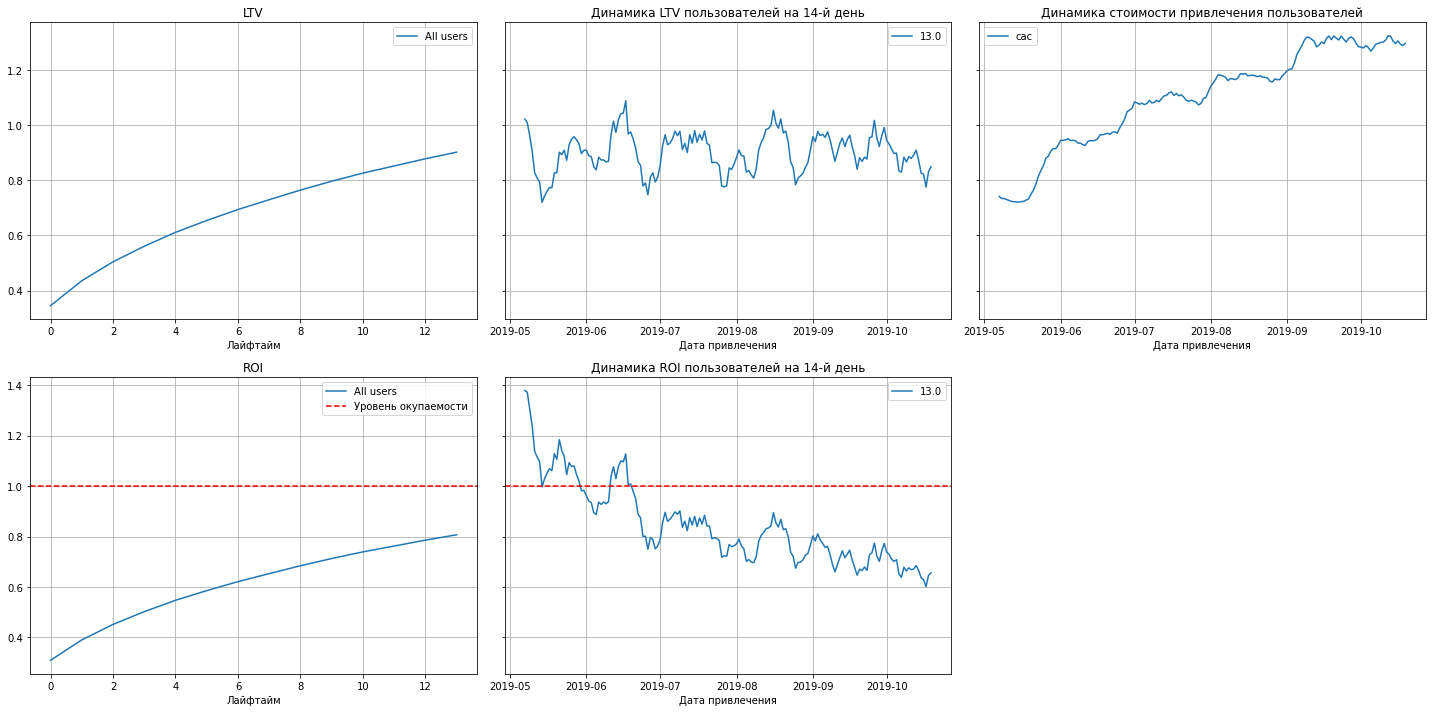

In [39]:
# calculate LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# build graphs
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

The graphs show that ROI is below the payback level. Advertising doesn't pay off. Dynamics of ROI on the 14th day falls more and more. LTV is constantly growing. The dynamics of the cost of attracting users is growing.

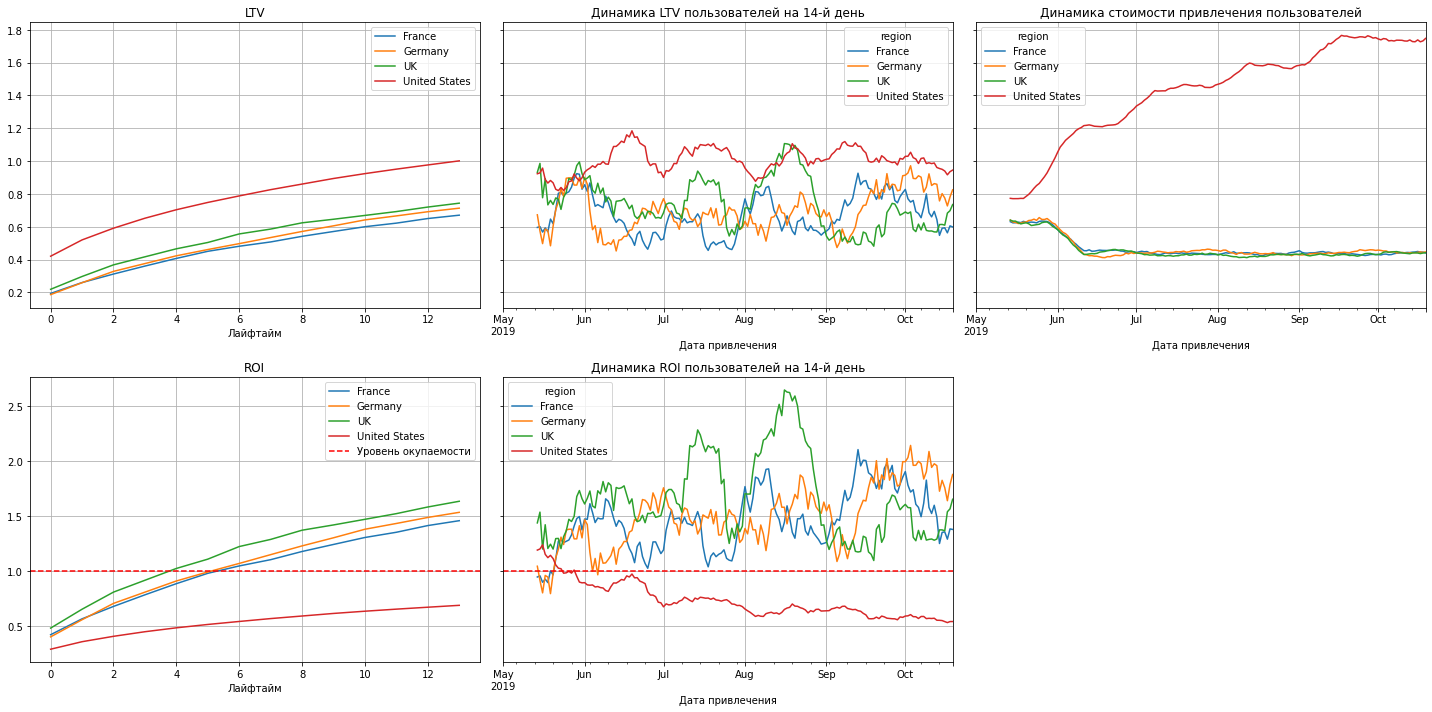

In [49]:
# look at the payback by country

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

We draw the following conclusions: Advertising doesn't pay off in the US. Pays well in the UK, Germany and France.
     The cost of attraction is stable in all countries except the USA. In the US, the dynamics of the cost is gradually increasing and differs significantly from other countries.
     LTV is stable and subject to seasonality.
     Advertising in the UK pays off best.
     There is a clear problem with payback in the US, although the cost of attraction is the highest.

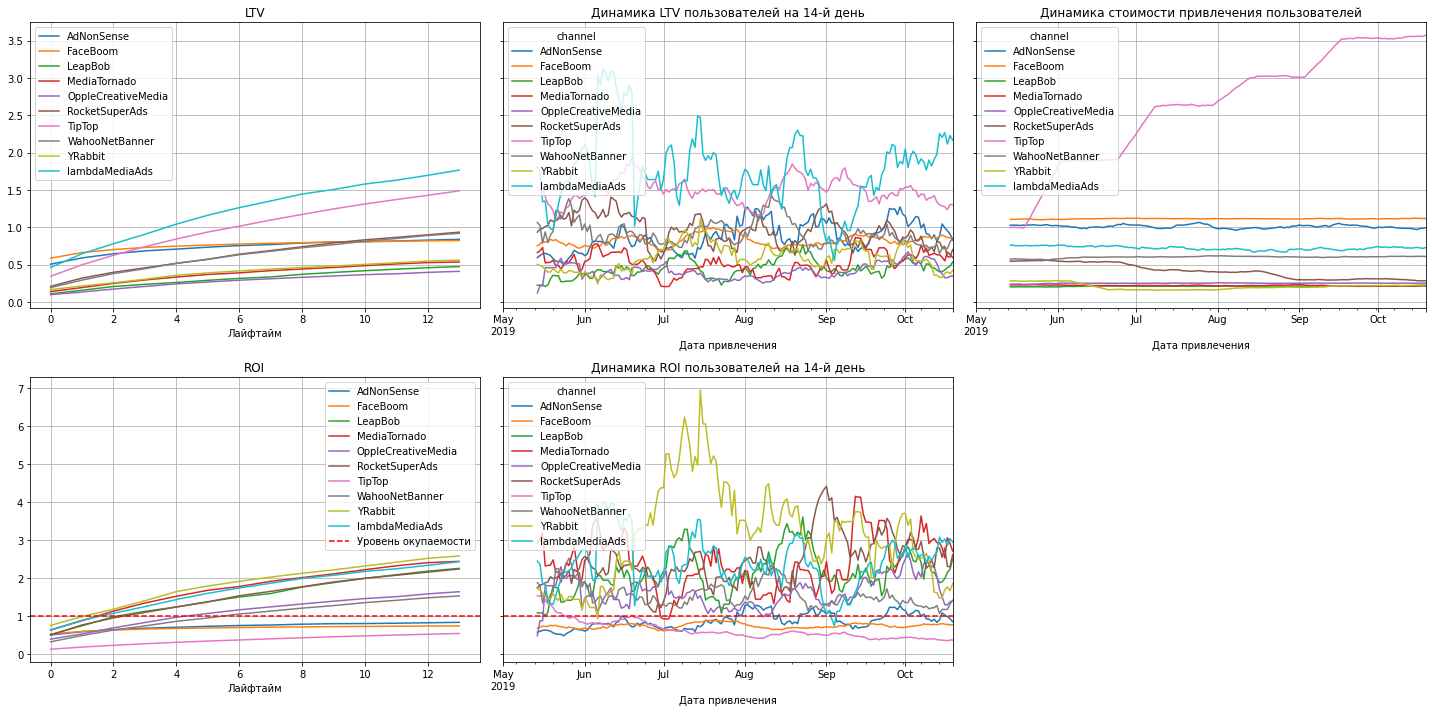

In [50]:
# look at the payback broken down by sources of attraction

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

The payback is at a good level except for the three traffic sources AdNonSense, FaceBoom and TipTop. The TipTop channel has the highest cost, although its payback is below the norm. 

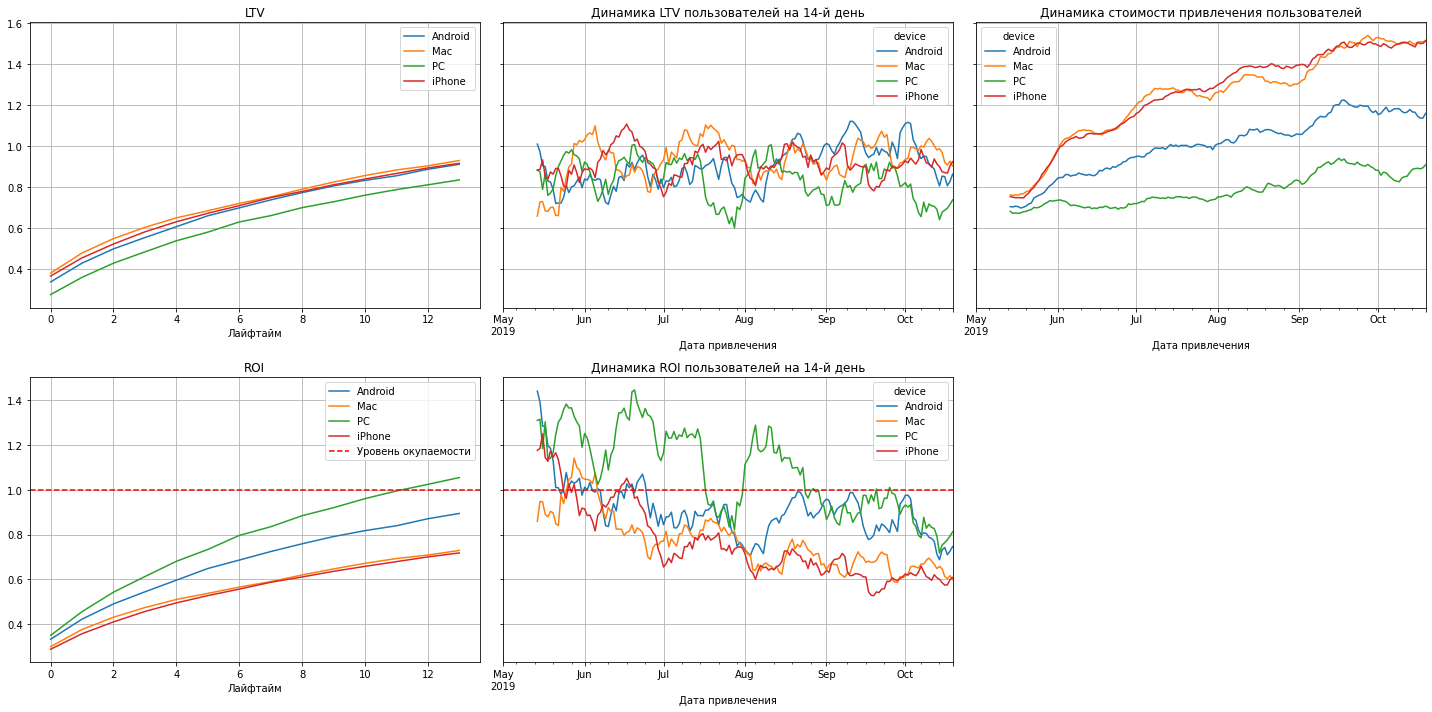

In [51]:
# check payback by device

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

It can be seen that PC users are paying off, while iPhone and Mac owners are not. Android owners start to pay off only a little towards the very end. PC users pay off the best, even though they were the least expensive to acquire. But for iPhone and Mac users the most. Although the cost of acquisition increased for everyone, the ROI chart at week 14 shows a noticeable decline for everyone.

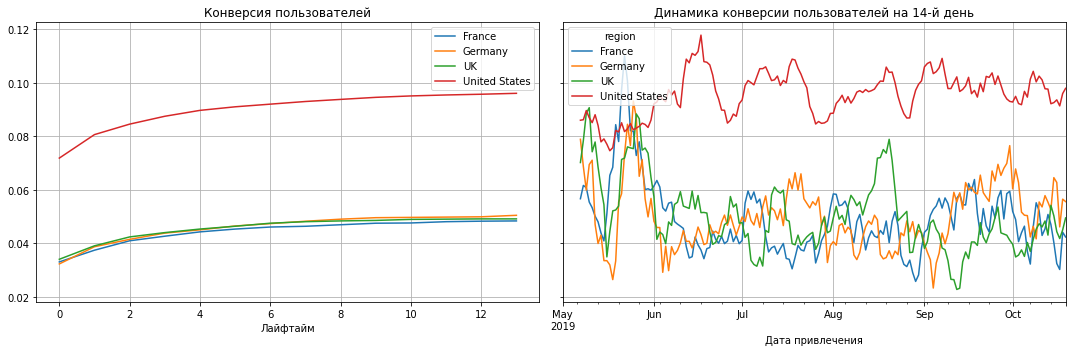

In [52]:
# conversion by country
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

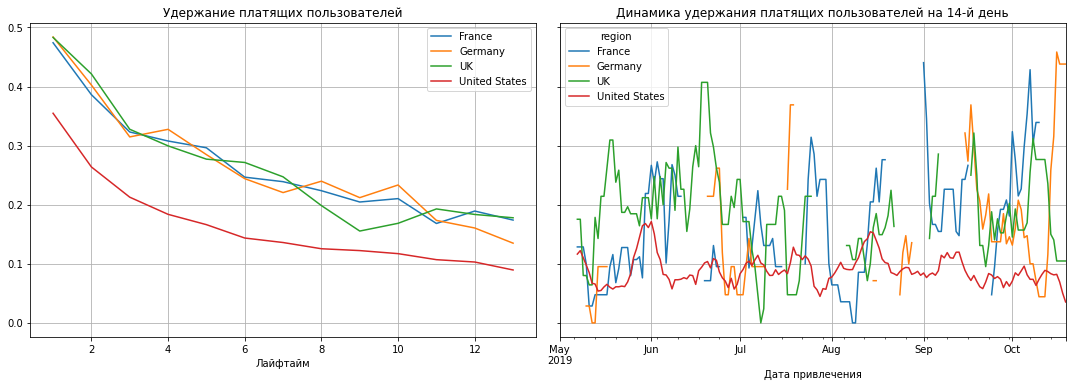

In [44]:
# retention by country
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

The conversion rate in the United States is almost twice as high as in other countries. But at the same time, retention in the United States is the lowest. Retention drops for all countries.

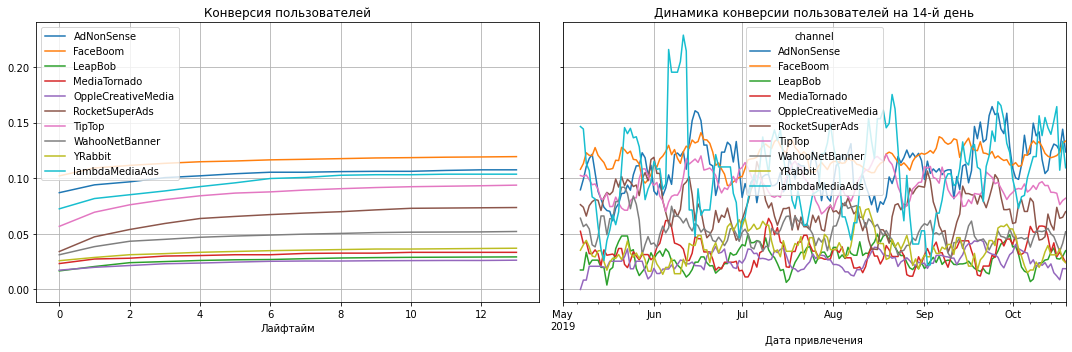

In [53]:
# conversion by channel
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

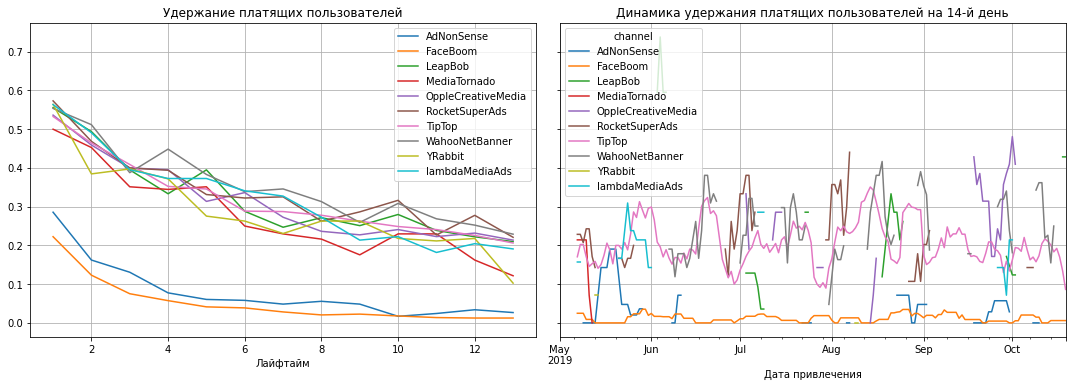

In [46]:
# retention by channel
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

FaceBoom has the highest conversion rate, followed by AdNonSense, LambdaMediaAds, TipTop. Retention of paying users drops for everyone. FaceBoom and AdNonSense have the lowest retention. 

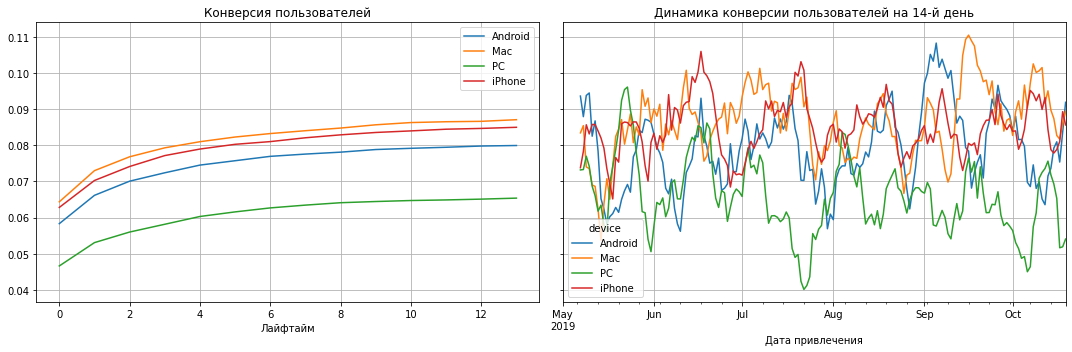

In [55]:
# conversion by device
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

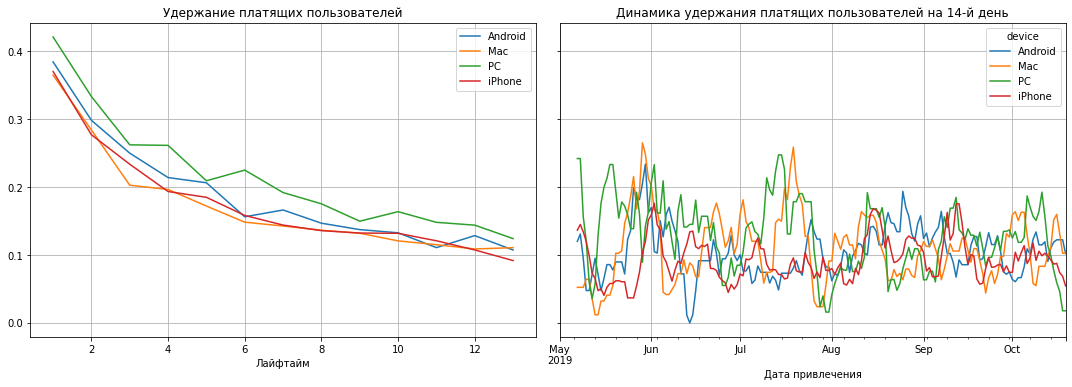

In [57]:
# retention by device
dimensions = ['device'] 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Mac and iPhone have the highest conversion rates, while PC lags behind. Retention of paying users is better on PC.

Conclusions:
In general, advertising ROI decreases over time, but advertising costs increase. As of November 1, 2019, advertising has not paid off.
Only in the US, the ROI did not pay off, although most of the money was invested in the US, growth is visible in other countries.
The TipTop channel has the highest cost, although its payback is poor. The money invested is not justified.
Mac and iPhone spend the most, although retention and payback is best for PC users. But payback drops over time on all devices.

### Conclusion


The study was based on user data from the US, UK, France and Germany using the Procrastinate Pro+ app. The moment of analysis is November 1, 2019. The analysis horizon is 14 days.

Among the countries by the number of users, most of all come from the USA (about 100k users), and the share of paying users is also the highest in the USA - about 7%.

Clients use devices such as iPhone, Android, Mac and PC. Most customers use the iPhone (54.4k devices), and the largest number of paying users (3.3k) account for the iPhone. The least paying users are on the PC, but at the same time, in terms of the number of use of applications from the PC, they are in third place.

There are 10 advertising sources in total, 11 is an organic traffic source, that is, these are users who joined the application without ads. Among them, 1.1k paying users - 3rd line in the list of paying users. The largest flow of customers falls on the FaceBoom channels (29.1k of them 3.5k paying) and TipTop (19.5k of them 1.8k paying), the most paying from FaceBoom (12%), AdNonSense (11%), lambdaMediaAds (10%) and TipTop (9%).
In general, 105497 were spent on marketing. Most of the money was spent on TipTop (54.7k) and FaceBoom (32.4k) - the most expensive channels. It is necessary to reduce spending on these channels.

The ad didn't pay off. Advertising spending should be reduced for US users and the TipTop and FaceBoom channel. Although the profit was large, but over time, the costs grew, the payback fell. It may also be worth paying attention to PC users, since solvency is higher than that of others. But most of the users are from mobile devices. ROI pays off in 7 out of 10 channels.

The problem lies in the excessive investment in advertising, the payback is not commensurate with the expenses. It is necessary to establish the optimal amount of investment in marketing.